# Linear Regression - Predicting Interest Rates

#### Problem: Given FICO Score and the loan amount requested, what will be the interest rate?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model, metrics, svm
from sklearn import cross_validation as cv

In [2]:
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')
loansData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 81174 to 3116
Data columns (total 14 columns):
Amount.Requested                  2500 non-null int64
Amount.Funded.By.Investors        2500 non-null float64
Interest.Rate                     2500 non-null object
Loan.Length                       2500 non-null object
Loan.Purpose                      2500 non-null object
Debt.To.Income.Ratio              2500 non-null object
State                             2500 non-null object
Home.Ownership                    2500 non-null object
Monthly.Income                    2499 non-null float64
FICO.Range                        2500 non-null object
Open.CREDIT.Lines                 2498 non-null float64
Revolving.CREDIT.Balance          2498 non-null float64
Inquiries.in.the.Last.6.Months    2498 non-null float64
Employment.Length                 2500 non-null object
dtypes: float64(5), int64(1), object(8)
memory usage: 293.0+ KB


In [3]:
loansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [4]:
# Clean Interest.Rate field
g = lambda x: round(float(x[0:-1])/100,4)
clean_Interest_Rate = loansData['Interest.Rate'].map(g)
loansData['Interest.Rate'] = clean_Interest_Rate

# Create fico_score field
j = lambda z: int(z.split('-')[0])
loansData['fico_score'] = loansData['FICO.Range'].map(j)

# Modify column names
loansData.columns = [col.replace(".", "_").lower() for col in loansData.columns]

loansData.head()

,amount_requested,amount_funded_by_investors,interest_rate,loan_length,loan_purpose,debt_to_income_ratio,state,home_ownership,monthly_income,fico_range,open_credit_lines,revolving_credit_balance,inquiries_in_the_last_6_months,employment_length,fico_score
81174,20000,20000.0,0.0890,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,735
99592,19200,19200.0,0.1212,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,715
80059,35000,35000.0,0.2198,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years,690
15825,10000,9975.0,0.0999,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years,695
33182,12000,12000.0,0.1171,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years,695


In [5]:
X = loansData[['amount_requested','fico_score']]
y = loansData['interest_rate']

#### Test two models with KFold cross-validation to determine which method to use.

In [6]:
model_1 = linear_model.LinearRegression()
mse_scores_1 = cv.cross_val_score(model_1, X, y, cv=10, scoring='mean_squared_error')
model_1_result = abs(mse_scores_1.mean())
model_1_result

0.00060132902562876609

In [7]:
model_2 = svm.SVR()
mse_scores_2 = cv.cross_val_score(model_2, X, y, cv=10, scoring='mean_squared_error')
model_2_result = abs(mse_scores_2.mean())
model_2_result

0.0021810386520000006

#### Using the linear regression estimator (model_1), we achieved a smaller (better) MSE than using the SVR estimator.

#### Demonstrate and graph some results.

In [8]:
X_train, X_test, y_train, y_test = cv.train_test_split(X, y, train_size=0.7, random_state=0)
model_1.fit(X_train, y_train)
predicted = model_1.predict(X_test)
expected = y_test

metrics.mean_squared_error(expected, predicted)

0.00058921001758735372

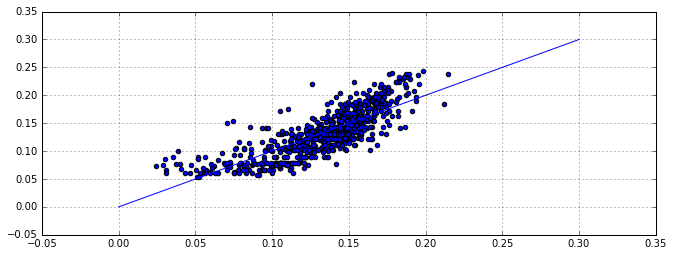

In [9]:
fig, ax = plt.subplots(figsize=(11,4))
ax.scatter(predicted, expected)
ax.plot((0,0.3),(0,0.3))
ax.grid()